In [1]:
import pandas as pd

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
df = pd.read_csv(r"C:\\Users\\Owner\Desktop\NVDA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,34.119999,34.250000,32.560001,33.009998,30.358782,12099100
1,2008-01-03,33.200001,33.860001,32.630001,32.750000,30.119659,11882700
2,2008-01-04,31.770000,31.930000,29.799999,30.000000,27.590534,18402300
3,2008-01-07,30.200001,30.450001,26.350000,26.900000,24.739513,25170000
4,2008-01-08,27.049999,29.290001,26.420000,27.469999,25.263729,27673900
...,...,...,...,...,...,...,...
3015,2019-12-23,240.520004,241.809998,238.389999,238.820007,238.497025,8876500
3016,2019-12-24,238.199997,239.309998,236.820007,238.619995,238.297287,3471600
3017,2019-12-26,238.759995,240.320007,238.000000,239.190002,238.866516,4571300
3018,2019-12-27,239.800003,240.339996,235.809998,236.869995,236.549637,6366100


In [4]:
df_d = df.reset_index()['Date']

In [5]:
df_d

0       2008-01-02
1       2008-01-03
2       2008-01-04
3       2008-01-07
4       2008-01-08
           ...    
3015    2019-12-23
3016    2019-12-24
3017    2019-12-26
3018    2019-12-27
3019    2019-12-30
Name: Date, Length: 3020, dtype: object

In [6]:
df_h = df.reset_index()['Open']
df_h

0        34.119999
1        33.200001
2        31.770000
3        30.200001
4        27.049999
           ...    
3015    240.520004
3016    238.199997
3017    238.759995
3018    239.800003
3019    235.990005
Name: Open, Length: 3020, dtype: float64

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,34.119999,34.250000,32.560001,33.009998,30.358782,12099100
1,2008-01-03,33.200001,33.860001,32.630001,32.750000,30.119659,11882700
2,2008-01-04,31.770000,31.930000,29.799999,30.000000,27.590534,18402300
3,2008-01-07,30.200001,30.450001,26.350000,26.900000,24.739513,25170000
4,2008-01-08,27.049999,29.290001,26.420000,27.469999,25.263729,27673900


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3015,2019-12-23,240.520004,241.809998,238.389999,238.820007,238.497025,8876500
3016,2019-12-24,238.199997,239.309998,236.820007,238.619995,238.297287,3471600
3017,2019-12-26,238.759995,240.320007,238.000000,239.190002,238.866516,4571300
3018,2019-12-27,239.800003,240.339996,235.809998,236.869995,236.549637,6366100
3019,2019-12-30,235.990005,236.199997,231.059998,232.320007,232.005798,6451400


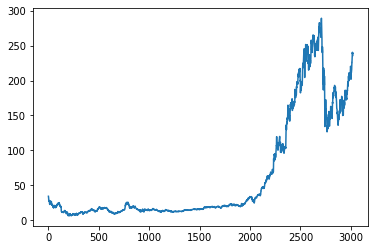

In [9]:
import matplotlib.pyplot as plt
plt.plot(df_h)

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_h = scaler.fit_transform(np.array(df_h).reshape(-1,1))
df_h.shape

(3020, 1)

In [12]:
df_h

array([[0.09925172],
       [0.09600452],
       [0.09095722],
       ...,
       [0.82154451],
       [0.82521529],
       [0.81176761]])

In [13]:
trng_size = int(len(df_h) * 0.8)
test_size = len(df_h) - trng_size
train_data = df_h[0:trng_size, :]
test_data = df_h[trng_size: len(df_h), :1]

In [14]:
len(train_data)

2416

In [15]:
import numpy 
def create_dataset(dataset, time_step = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i + time_step), 0]
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return numpy.array(data_x), numpy.array(data_y)

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
print(x_train)

[[0.09925172 0.09600452 0.09095722 ... 0.06120288 0.06148524 0.06215587]
 [0.09600452 0.09095722 0.08541579 ... 0.06148524 0.06215587 0.06053226]
 [0.09095722 0.08541579 0.07429761 ... 0.06215587 0.06053226 0.0635324 ]
 ...
 [0.32440351 0.33040378 0.33015671 ... 0.5727446  0.54457853 0.5609911 ]
 [0.33040378 0.33015671 0.34014542 ... 0.54457853 0.5609911  0.551073  ]
 [0.33015671 0.34014542 0.33972186 ... 0.5609911  0.551073   0.56385005]]


In [18]:
print(x_train.shape), print(y_train.shape)

(2315, 100)
(2315,)


(None, None)

In [19]:
print(x_test.shape), print(y_test.shape)

(503, 100)
(503,)


(None, None)

In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
model = Sequential()
model.add(LSTM(70, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(90, return_sequences = True))
model.add(LSTM(110))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
lstm_2 (LSTM)                (None, 110)               88440     
_________________________________________________________________
dense (Dense)                (None, 1)                 111       
Total params: 166,671
Trainable params: 166,671
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 150, batch_size = 64, verbose = 1)

Epoch 1/150
37/37 [==============================] - 13s 338ms/step - loss: 0.0016 - val_loss: 0.0034
Epoch 2/150
37/37 [==============================] - 11s 310ms/step - loss: 1.5911e-04 - val_loss: 0.0036
Epoch 3/150
37/37 [==============================] - 12s 321ms/step - loss: 1.6905e-04 - val_loss: 0.0025
Epoch 4/150
37/37 [==============================] - 13s 343ms/step - loss: 1.3004e-04 - val_loss: 0.0026
Epoch 5/150
37/37 [==============================] - 12s 331ms/step - loss: 1.2097e-04 - val_loss: 0.0024
Epoch 6/150
37/37 [==============================] - 12s 319ms/step - loss: 1.1862e-04 - val_loss: 0.0026
Epoch 7/150
37/37 [==============================] - 12s 316ms/step - loss: 1.1489e-04 - val_loss: 0.0027
Epoch 8/150
37/37 [==============================] - 12s 317ms/step - loss: 1.1442e-04 - val_loss: 0.0021
Epoch 9/150
37/37 [==============================] - 12s 319ms/step - loss: 1.5215e-04 - val_loss: 0.0026
Epoch 10/150
37/37 [==============================

In [27]:
import tensorflow as tf

In [28]:
predict_train = model.predict(x_train)
predict_test = model.predict(x_test)

In [29]:
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, predict_train))

40.84979042088915

In [31]:
math.sqrt(mean_squared_error(y_test, predict_test))

209.23429353734036

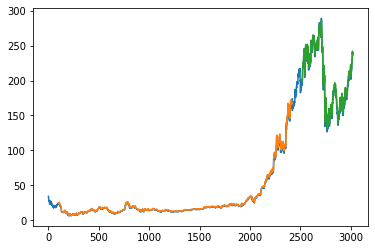

In [32]:
# Shifts train predictions for Plotting 
import numpy
look_back = 100
trainPredictPlot = numpy.empty_like(df_h)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(predict_train) + look_back: ] = predict_train
# Shifts train predictions for Plotting 
testPredictPlot = numpy.empty_like(df_h)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(predict_train) + (look_back*2)  + 1: len(df_h) - 1, : ] = predict_test
plt.plot(scaler.inverse_transform(df_h))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

604

In [34]:
test_input = test_data[504:].reshape(1,-1)
test_input.shape

(1, 100)

In [35]:
temp_input = list(test_input)
temp_input = temp_input[0].tolist()
temp_input

[0.5301779023321852,
 0.5315897122648314,
 0.5156007284723808,
 0.5131653092187026,
 0.5170831440788437,
 0.511188756253278,
 0.5412607730169935,
 0.558096820179734,
 0.5808273116412849,
 0.5807214278376042,
 0.5845686534943506,
 0.5732034095283641,
 0.5633559122423712,
 0.5682267436905718,
 0.5456021395622795,
 0.5608498873148764,
 0.5748270400120384,
 0.5597204506634084,
 0.5668854900176535,
 0.5889806257134534,
 0.6099110501574991,
 0.6137935539441096,
 0.6112522544163286,
 0.6274530552302295,
 0.6360299045171208,
 0.619758547443492,
 0.6103345818426441,
 0.6158407161129288,
 0.6169348746345329,
 0.6149230435392443,
 0.603204820618263,
 0.588380604550811,
 0.6003812007529705,
 0.5877099777143518,
 0.6065226307861837,
 0.5988281794726908,
 0.588733583505806,
 0.5964986440226935,
 0.589863020157274,
 0.5902159991122689,
 0.6190879206070329,
 0.6303120061690526,
 0.6164054591457073,
 0.6152760224942392,
 0.6163348534718905,
 0.6367711405569746,
 0.6340533480221183,
 0.6500070572142829,

In [36]:
from numpy import array 

output_lst = []
n_steps = 100
i = 0
while (i < 30):
    if(len(temp_input)>100):
        #print(temp_input)
        test_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,test_input))
        test_input=test_input.reshape(1,-1)
        test_input=test_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(test_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output_lst.extend(yhat.tolist())
        i=i+1
    else:
        test_input = test_input.reshape((1, n_steps,1))
        yhat = model.predict(test_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output_lst.extend(yhat.tolist())
        i=i+1
print(output_lst)

[0.8176447]
101
1 day input [0.53158971 0.51560073 0.51316531 0.51708314 0.51118876 0.54126077
 0.55809682 0.58082731 0.58072143 0.58456865 0.57320341 0.56335591
 0.56822674 0.54560214 0.56084989 0.57482704 0.55972045 0.56688549
 0.58898063 0.60991105 0.61379355 0.61125225 0.62745306 0.6360299
 0.61975855 0.61033458 0.61584072 0.61693487 0.61492304 0.60320482
 0.5883806  0.6003812  0.58770998 0.60652263 0.59882818 0.58873358
 0.59649864 0.58986302 0.590216   0.61908792 0.63031201 0.61640546
 0.61527602 0.61633485 0.63677114 0.63405335 0.65000706 0.6670902
 0.67061978 0.66465478 0.65988989 0.67873782 0.65759563 0.67326696
 0.68509107 0.70697444 0.70672734 0.6988564  0.69236199 0.68332628
 0.70538614 0.72176338 0.71523364 0.7239517  0.71177467 0.71209232
 0.71904559 0.71421008 0.71625719 0.71897498 0.69846814 0.72366933
 0.70969223 0.72356344 0.72388109 0.74135249 0.75709443 0.7506353
 0.74474091 0.74283496 0.69133838 0.72363405 0.72109275 0.72539884
 0.72444584 0.73196386 0.73556399 0.7

In [37]:
train_day = np.arange(1, 101)
test_day = np.arange(101, 131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df_h)

3020

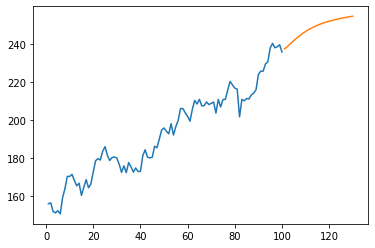

In [40]:
plt.plot(train_day, scaler.inverse_transform(df_h[2920:]))
plt.plot(test_day, scaler.inverse_transform(output_lst))

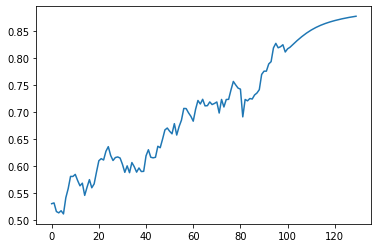

In [41]:
df_final = df_h.tolist()
df_final.extend(output_lst)
plt.plot(df_final[2920:])

In [42]:
df_final = scaler.inverse_transform(df_final).tolist()

In [43]:
df_final[3020:]

[[237.6551064648994],
 [238.46493158342236],
 [239.64923010416084],
 [240.8173169240593],
 [241.94673208257905],
 [243.02550256316218],
 [244.04824135271707],
 [245.0115203520036],
 [245.91284025714228],
 [246.75046168773048],
 [247.52418199750767],
 [248.23545348467414],
 [248.88726518157225],
 [249.48375444935385],
 [250.02975102389422],
 [250.53040549764773],
 [250.99068270399664],
 [251.41549681475803],
 [251.80885009357684],
 [252.17464348096763],
 [252.51581534770767],
 [252.83496632080673],
 [253.13440994507215],
 [253.41575050339958],
 [253.68033897085903],
 [253.92942499939022],
 [254.16383606122355],
 [254.38450095171962],
 [254.59194317371808],
 [254.78704086101442]]

In [44]:
len(df_final[3020:])

30